# Shor's algorithm

$$U|\psi\rangle=\lambda|\psi\rangle$$

|\psi\rangle is an eigenvector of the **unitary** operator $U$. Since it is unitary, the eigenvector $\lambda$ is a phase.

$$\lambda = e^{i 2\pi \theta}$$

This is a **global phase**. In quantum mechanics, global phases do not matter, they are in fact a symmetry from the Schroedinger's equation, and it cannot be measured. However, this phase can be estimated using a quantum computer.

What is happening here?

The problem, we have to clarify, that although this is a global phase, the operator U **actually** introduces this phase. We have no limitation introducing a global phase in the definition of the state $\psi\rangle$, but the induced phase of U is $\theta$ **always**.

As we will see, the estimation of this phase is using a Control-U gate:

$$\left|\pi_2\right\rangle=\frac{1}{\sqrt{2}}|\psi\rangle|0\rangle+\frac{U}{\sqrt{2}}|\psi\rangle|1\rangle=\frac{1}{\sqrt{2}}|\psi\rangle|0\rangle+\frac{e^{2 \pi i \theta}}{\sqrt{2}}|\psi\rangle|1\rangle=|\psi\rangle \otimes\left(\frac{1}{\sqrt{2}}|0\rangle+\frac{e^{2 \pi i \theta}}{\sqrt{2}}|1\rangle\right)$$

If instead of $\psi$ we choose $$|\psi'\rangle = e^{i\phi}|\psi\rangle$$

We still obtain the same entangled state, but with the global phase

$$\left|\pi_2\right\rangle= \left(\frac{1}{\sqrt{2}}|\psi'\rangle|0\rangle+\frac{U}{\sqrt{2}}|\psi'\rangle|1\rangle \right)= e^{i\phi}|\psi\rangle \otimes\left(\frac{1}{\sqrt{2}}|0\rangle+\frac{e^{2 \pi i \theta}}{\sqrt{2}}|1\rangle\right)$$

## 1-Qubit approximation

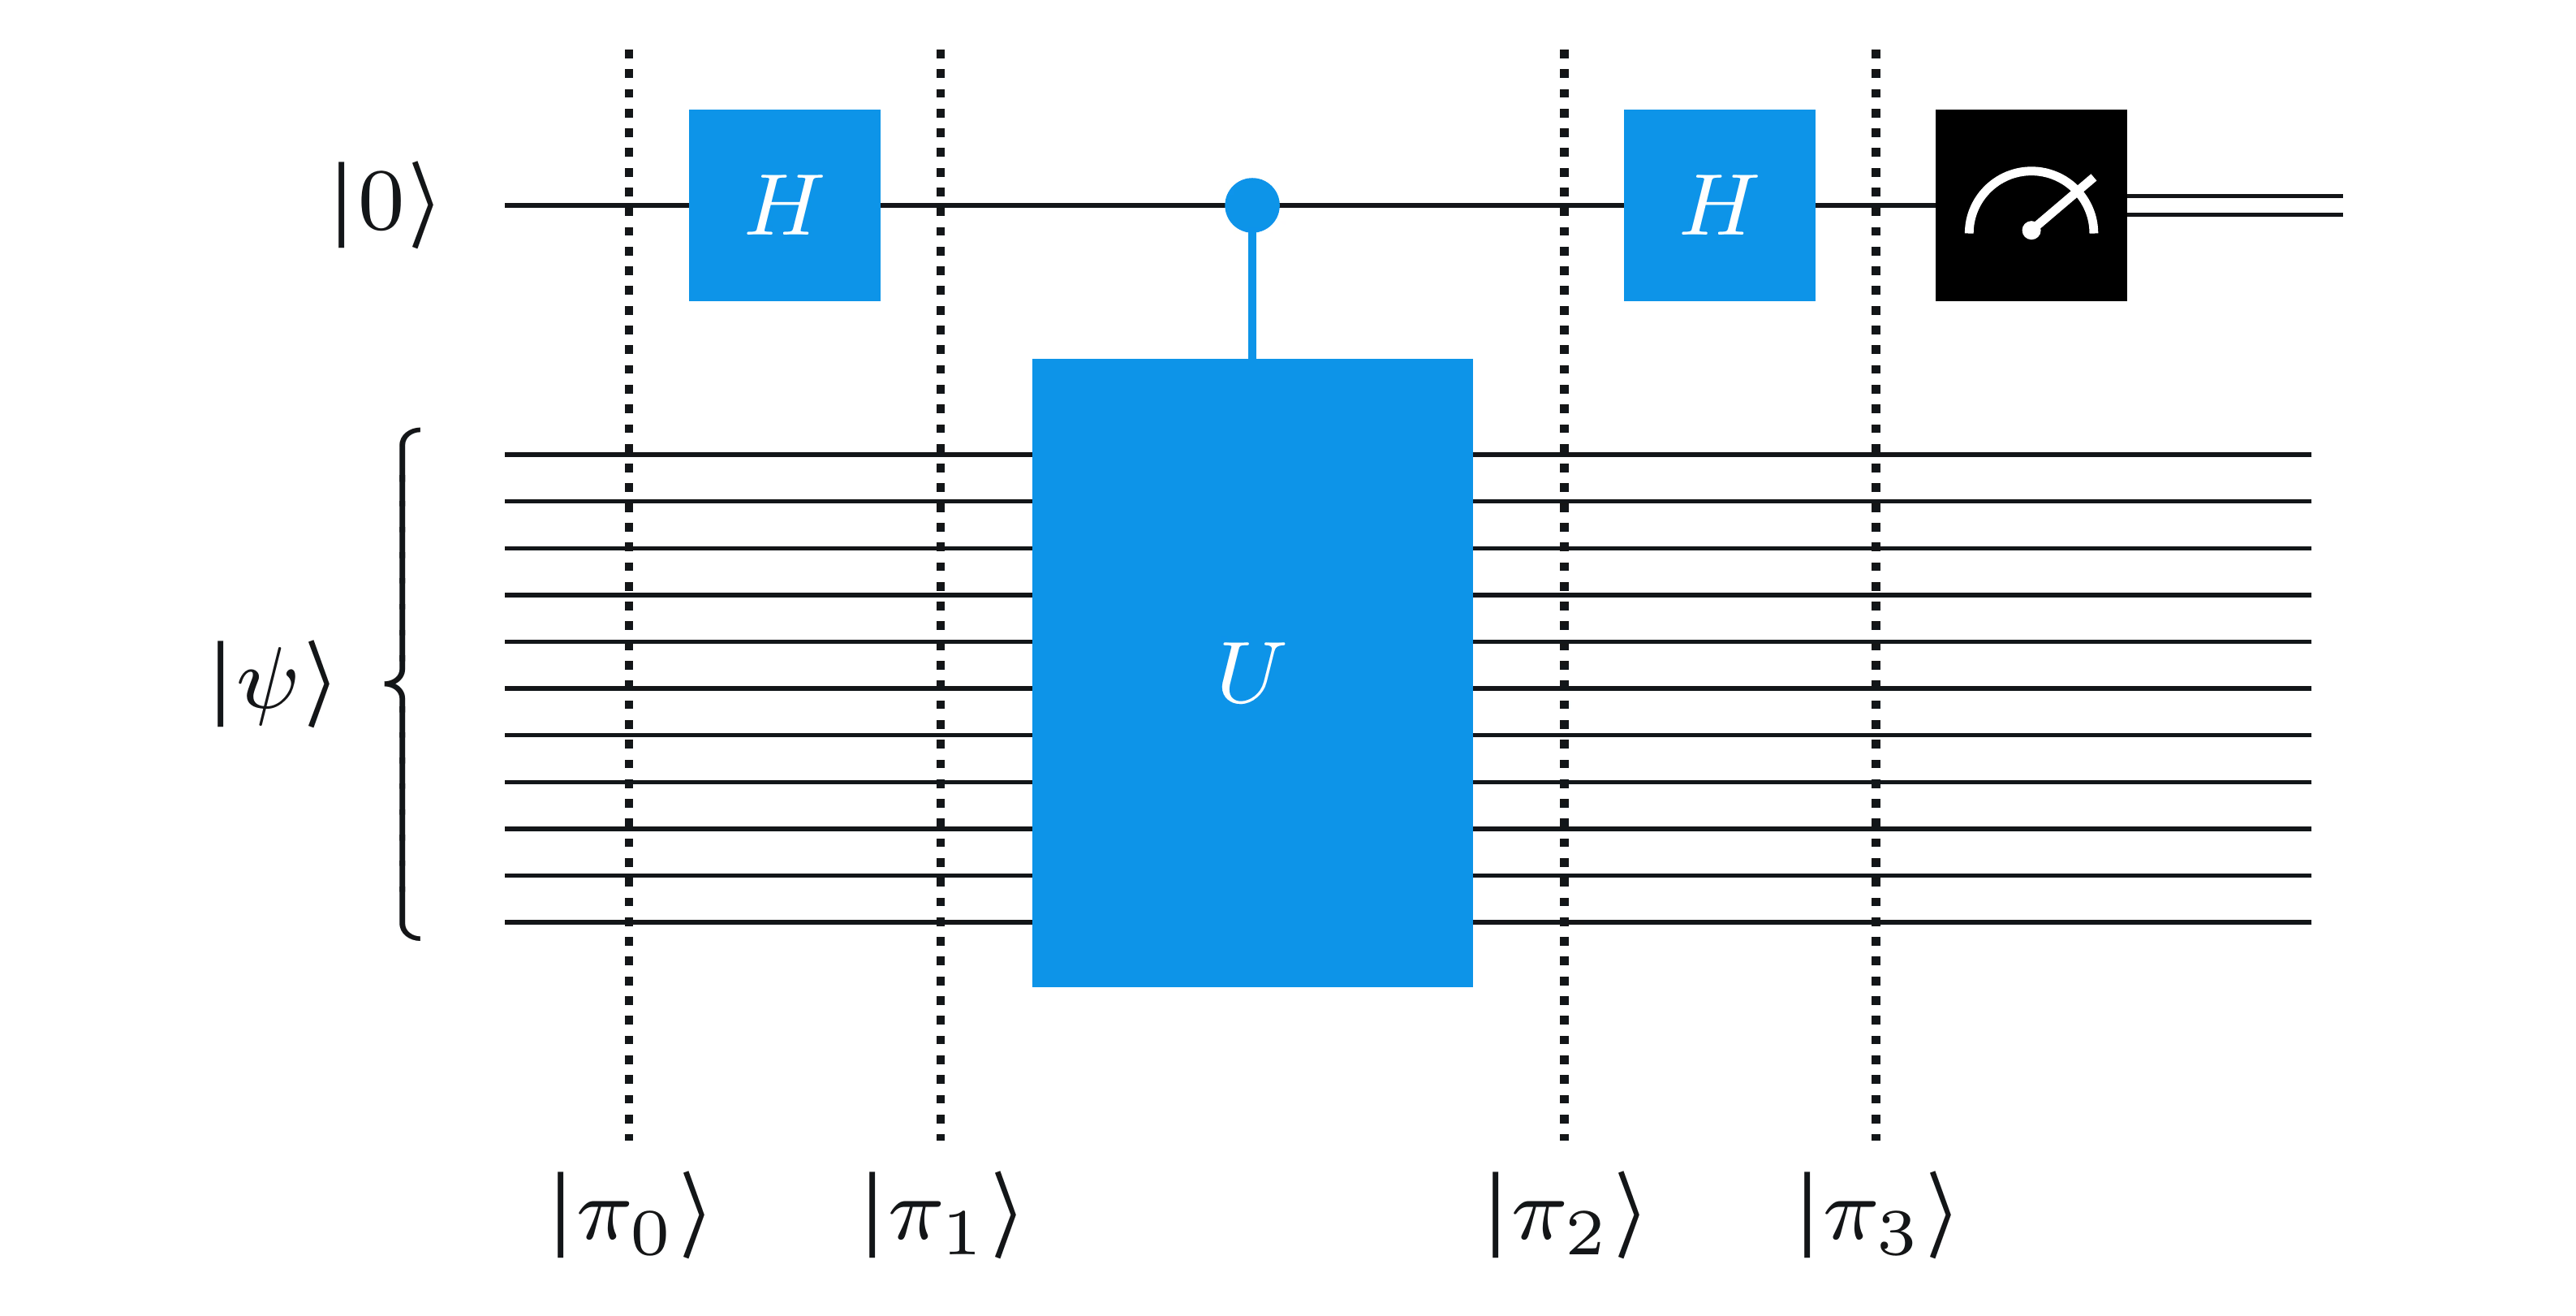

The initial state of the circuit is

$$
\left|\pi_0\right\rangle=|\psi\rangle|0\rangle
$$

and the first Hadamard gate transforms this state to

$$
\left|\pi_1\right\rangle=|\psi\rangle|+\rangle=\frac{1}{\sqrt{2}}|\psi\rangle|0\rangle+\frac{1}{\sqrt{2}}|\psi\rangle|1\rangle .
$$


Next, the controlled- $U$ operation is performed, which results in the state

$$
\left|\pi_2\right\rangle=\frac{1}{\sqrt{2}}|\psi\rangle|0\rangle+\frac{1}{\sqrt{2}}(U|\psi\rangle)|1\rangle .
$$


Using the assumption that $|\psi\rangle$ is an eigenvector of $U$ having eigenvalue $\lambda=$ $e^{2 \pi i \theta}$, we can alternatively express this state as follows.

$$
\left|\pi_2\right\rangle=\frac{1}{\sqrt{2}}|\psi\rangle|0\rangle+\frac{e^{2 \pi i \theta}}{\sqrt{2}}|\psi\rangle|1\rangle=|\psi\rangle \otimes\left(\frac{1}{\sqrt{2}}|0\rangle+\frac{e^{2 \pi i \theta}}{\sqrt{2}}|1\rangle\right)
$$


Here we see the phase kickback phenomenon taking place. It is slightly different this time than it was for Deutsch's algorithm and the Deutsch-Jozsa algorithm because we're not working with a query gate - but the idea is the similar.

Finally, the second Hadamard gate is performed, which results in the state

$$
\left|\pi_3\right\rangle=|\psi\rangle \otimes\left(\frac{1+e^{2 \pi i \theta}}{2}|0\rangle+\frac{1-e^{2 \pi i \theta}}{2}|1\rangle\right) .
$$


The measurement therefore yields the outcomes 0 and 1 with these probabilities:

$$
\begin{aligned}
& p_0=\left|\frac{1+e^{2 \pi i \theta}}{2}\right|^2=\cos ^2(\pi \theta) \\
& p_1=\left|\frac{1-e^{2 \pi i \theta}}{2}\right|^2=\sin ^2(\pi \theta)
\end{aligned}
$$


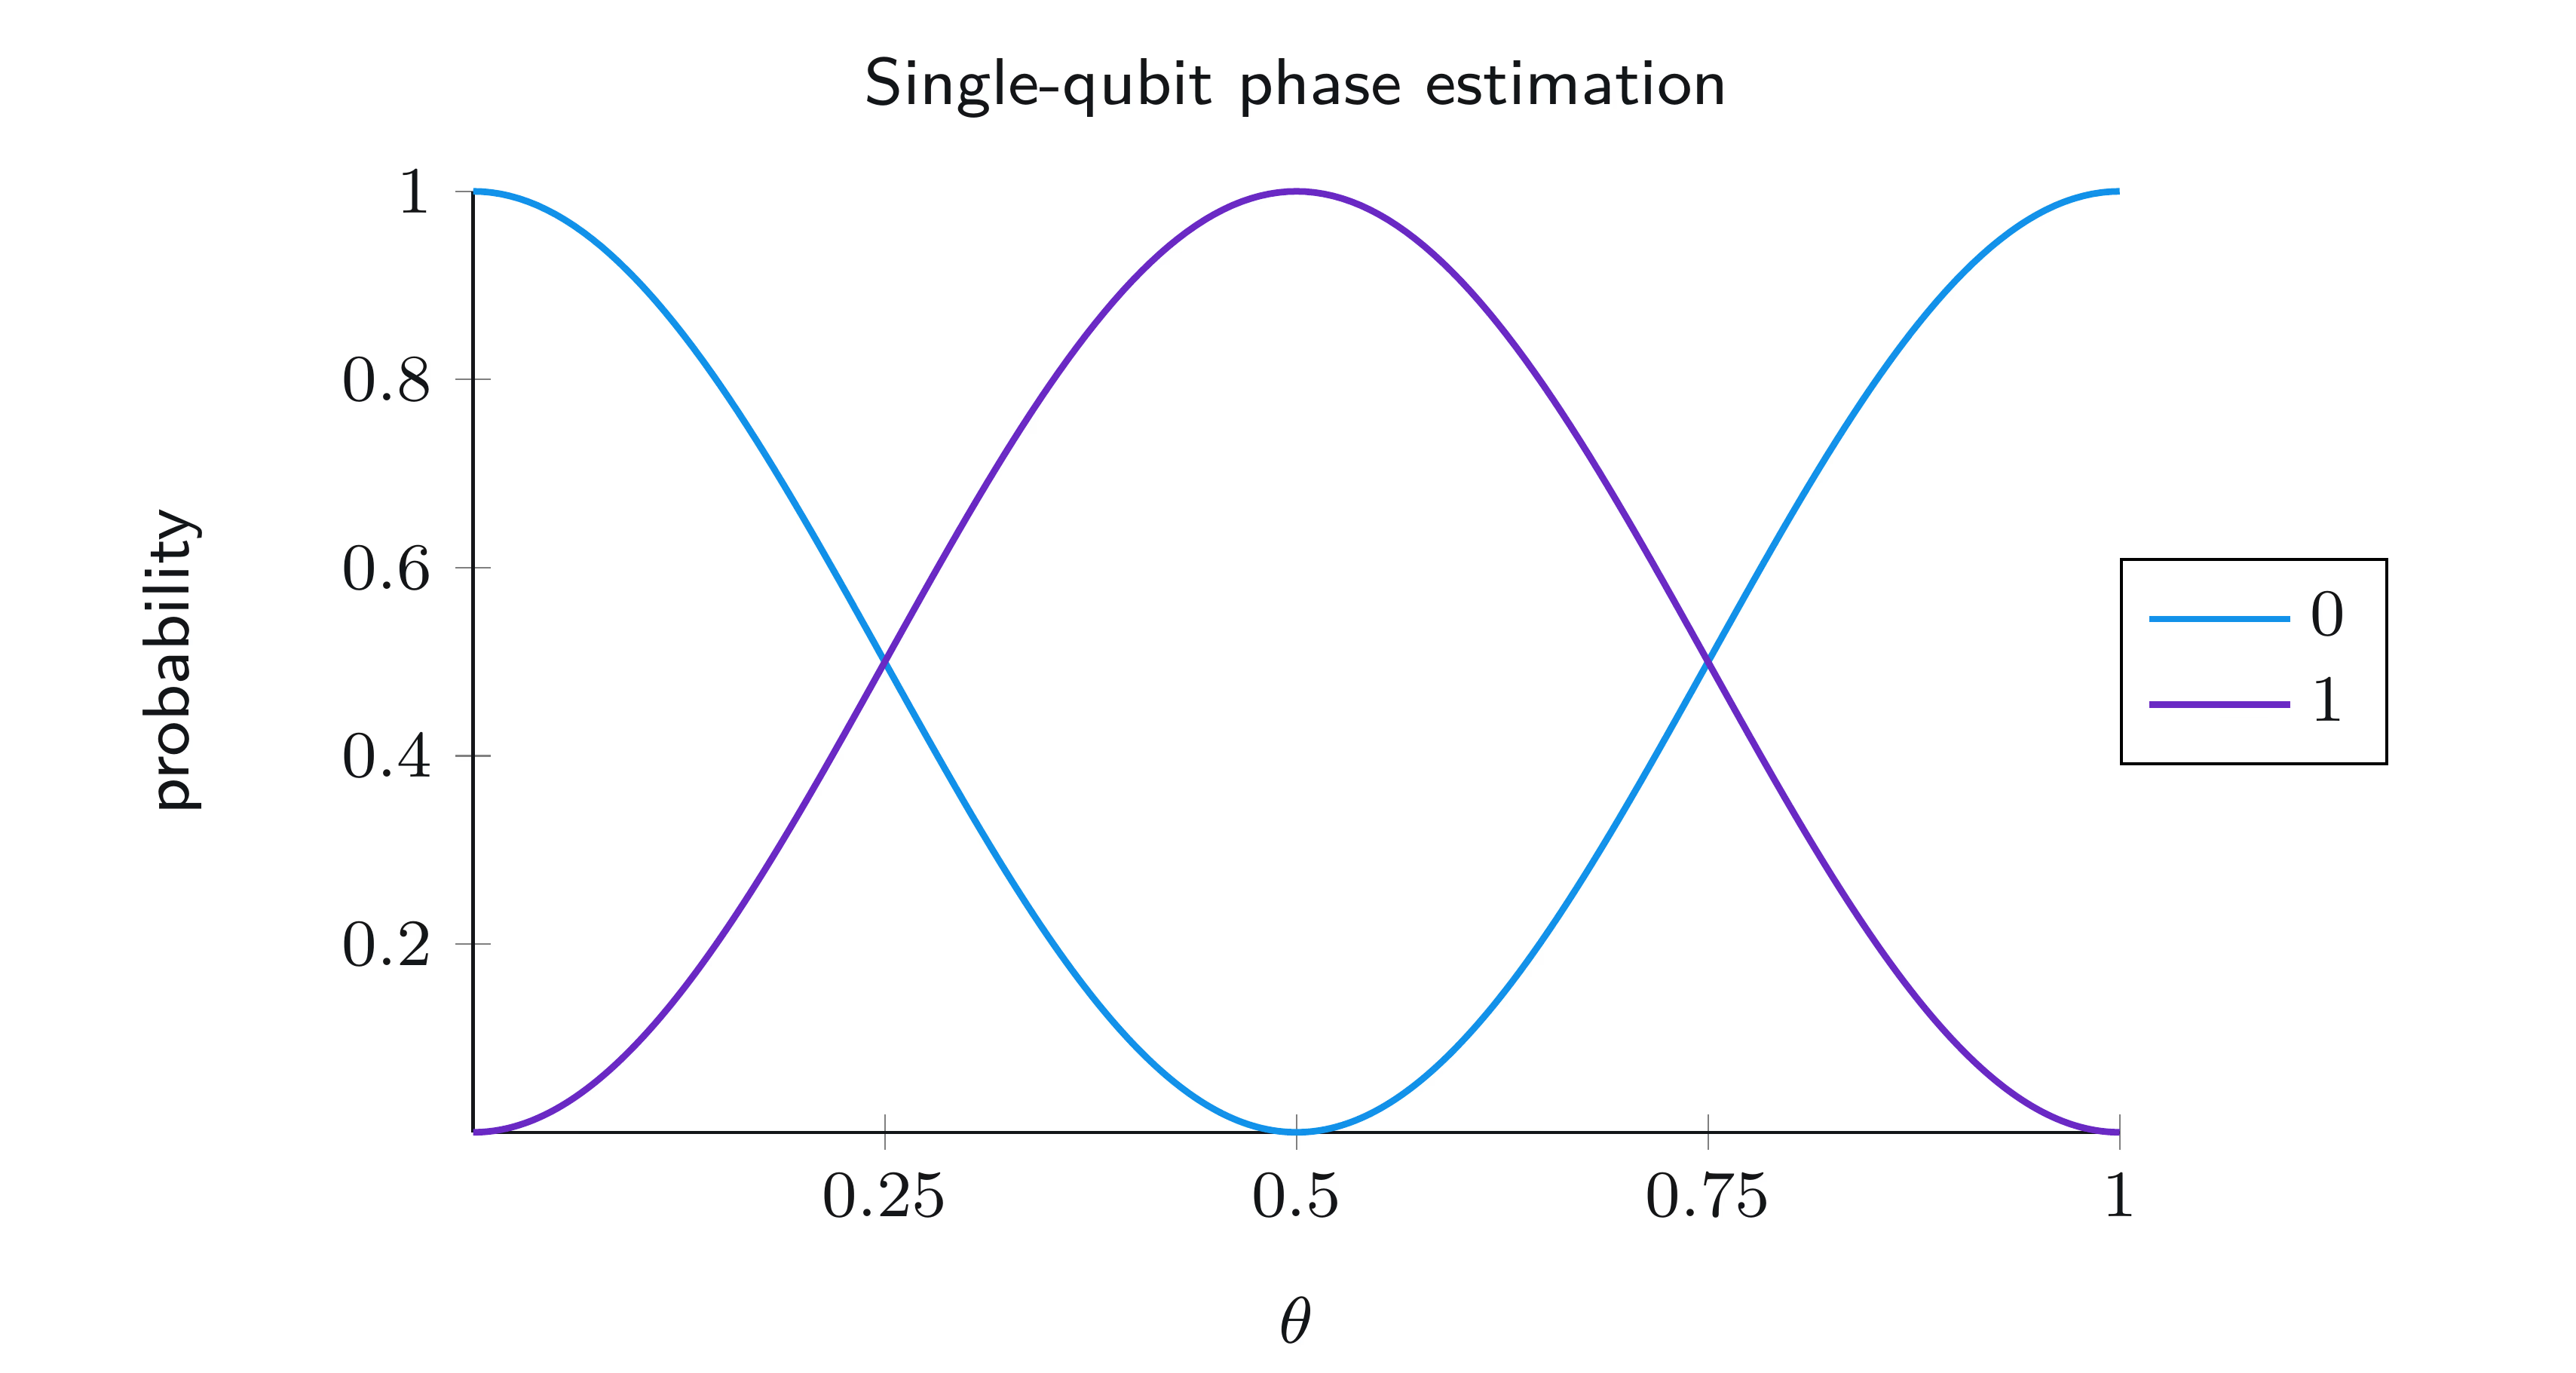

### Qiskit

The U-gate will be the X gate. This is an introduced phase of $\theta = 1/2$

In [1]:
from math import pi, cos, sin
from qiskit import QuantumCircuit

def one_qubit_phase_estimation(qc, theta, draw_circuit=True):
    
    # Prepare eigenvector, which is the |1> state
    qc.barrier()

    # Implement the estimation procedure
    qc.h(0)
    qc.cp(2 * pi * theta, 0, 1)
    qc.h(0)
    qc.barrier()
    
    # Perform the final measurement
    qc.measure(0, 0)

    if draw_circuit:
        # Draw the circuit
        display(qc.draw("mpl"))

C:\Users\jacob\AppData\Local\Temp\ipykernel_16828\2385454305.py:2: FutureWarning: The `qiskit` package is not installed, only `qiskit-terra` is installed. Starting in Qiskit 1.0.0 only the `qiskit` package will be published. Migrate any requirements files still using `qiskit-terra` to use `qiskit` instead. See https://qisk.it/1-0-packaging-migration for more detail.
  from qiskit import QuantumCircuit


c:\Users\jacob\anaconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


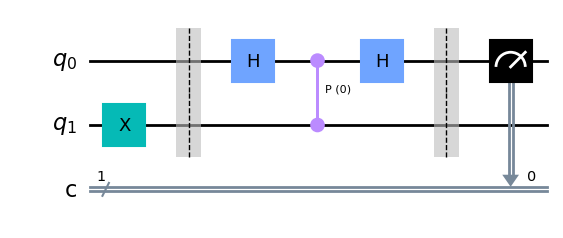

Text(0, 0.5, 'Probability')

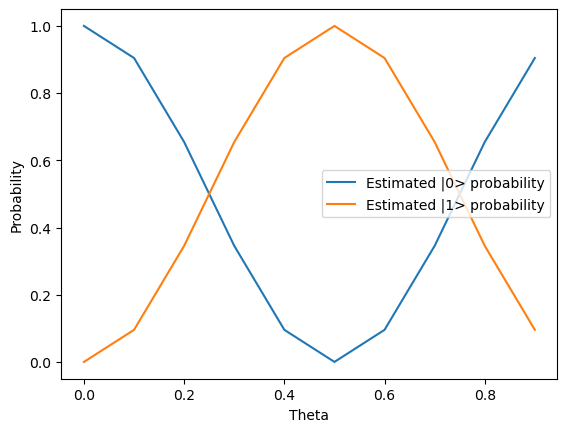

In [2]:
from qiskit.primitives import Sampler
import matplotlib.pyplot as plt

thetas = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]  # Can be changed to any value between 0 and 1
results_zero = []
results_one = []

for theta in thetas:
    qc = QuantumCircuit(2, 1)

    qc.x(1)  # Prepare the |1> state, which is the eigenvector

    if theta == 0:
        drawing = True
    else:
        drawing = False
        
    one_qubit_phase_estimation(qc, theta, draw_circuit=drawing)

    measurements = Sampler().run(qc).result().quasi_dists[0]

    if 0 in measurements:
        results_zero.append(measurements[0])
    else:
        results_zero.append(0)
    
    if 1 in measurements:
        results_one.append(measurements[1])
    else:
        results_one.append(0)
        
plt.plot(thetas, results_zero, label="Estimated |0> probability")
plt.plot(thetas, results_one, label="Estimated |1> probability")
plt.legend()
plt.xlabel("Theta")
plt.ylabel("Probability")


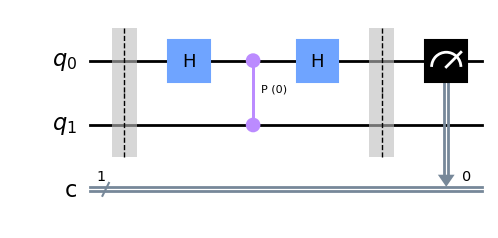

Text(0, 0.5, 'Probability')

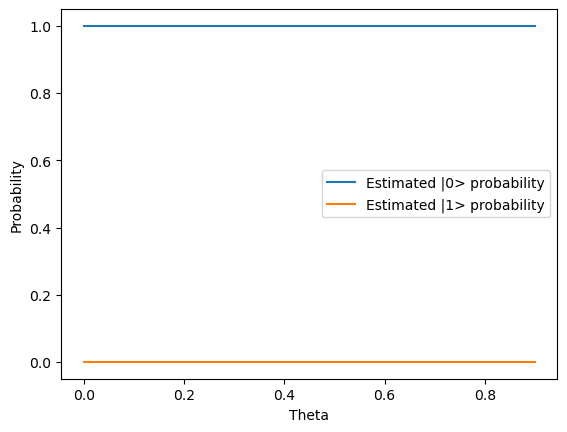

In [3]:
thetas = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]  # Can be changed to any value between 0 and 1
results_zero = []
results_one = []

for theta in thetas:
    qc = QuantumCircuit(2, 1)

    if theta == 0:
        drawing = True
    else:
        drawing = False
        
    one_qubit_phase_estimation(qc, theta, draw_circuit=drawing)

    measurements = Sampler().run(qc).result().quasi_dists[0]

    if 0 in measurements:
        results_zero.append(measurements[0])
    else:
        results_zero.append(0)
    
    if 1 in measurements:
        results_one.append(measurements[1])
    else:
        results_one.append(0)
        
plt.plot(thetas, results_zero, label="Estimated |0> probability")
plt.plot(thetas, results_one, label="Estimated |1> probability")
plt.legend()
plt.xlabel("Theta")
plt.ylabel("Probability")


As we see, the X-gate to initialize the qubit in the $|\psi\rangle = |1\rangle$ is necessary to reproduce the output. Basically, $|0\rangle$ is an eigenvector, but its eigenvalue is $\lambda = 1$ for the C-Phase opearation. What we see in this output is preciselly this, the values for $\theta = 0$, which is the introduced phase.

## 2 Qubit Phase Estimation

---
**IMPORTANT**

In the following, we will use the *binary representation* for representate the approximated value of $\theta$. If we have n qubits:

$$\theta=a_0 \cdot 2^{-1}+a_1 \cdot 2^{-2}+a_2 \cdot 2^{-3}+\ldots+a_{n-1} \cdot 2^{-n}$$

$$\theta = \sum_{i=0}^{n-1} a_i \cdot 2^{-(i+1)}$$

As an example, for 1 qubit:
$$
0 . a= \begin{cases}0 & a=0 \\ \frac{1}{2} & a=1 .\end{cases}
$$

---

The base of the two-qubit approximation is the following:

After the two hadamard, we have the uniform superposition of states

$$
\left|\pi_1\right\rangle=|\psi\rangle \otimes \frac{1}{2} \sum_{a_0=0}^1 \sum_{a_1=0}^1\left|a_1 a_0\right\rangle = |\psi\rangle \otimes \frac{1}{4} \left( \left|00\right\rangle + \left|01\right\rangle + \left|10\right\rangle + \left|11\right\rangle \right)
$$

Applying the C-U being $a_0$ the control qubit, introduces the $\theta$ phase:

$$
\left|\pi_2\right\rangle = |\psi\rangle \otimes \frac{1}{4} \left( |00\rangle + |01\rangle + e^{i 2 \pi \theta} |10\rangle + e^{i 2 \pi \theta} |11\rangle \right)
$$ 

This can be expressed as

$$
\left|\pi_2\right\rangle = |\psi\rangle \otimes \frac{1}{4} \left( e^{i 2 \pi \theta \cdot 0} |00\rangle + e^{i 2 \pi \theta \cdot 0} |01\rangle + e^{i 2 \pi \theta \cdot 1} |10\rangle + e^{i 2 \pi \theta \cdot 1} |11\rangle \right) = \\ = |\psi\rangle \otimes \frac{1}{2} \sum_{a_0=0}^1 \sum_{a_1=0}^1 e^{i 2 \pi \theta \cdot a_0}\left|a_1 a_0\right\rangle
$$ 

Everytime we apply a Control-U using the qubit $a_i$ as control, it introduces a phase $e^{i 2 \pi \theta \cdot a_i}$

$$
\left|\pi_3\right\rangle=|\psi\rangle \otimes \frac{1}{2} \sum_{a_0=0}^1 \sum_{a_1=0}^1 e^{2 \pi i \theta \cdot \left(2 a_1+a_0\right)}\left|a_1 a_0\right\rangle
$$

The phase introduced is the binary representation of $x=\{0,1,2,3\}$. For example, if the input is $x = 2$, this means $|a_1 a_0\rangle = |10\rangle$, which means a phase $e^{i 2 \pi \theta \cdot 4}$. Thus, we can expresate in a most compact way:

$$
\left|\pi_3\right\rangle=|\psi\rangle \otimes \frac{1}{2} \sum_{x=0}^3 e^{2 \pi i \theta \cdot x}|x\rangle
$$

Written in the full form:

$$
\left|\pi_3\right\rangle = |\psi\rangle \otimes \frac{1}{4} \left( |00\rangle + e^{i 2 \pi \theta} |01\rangle + e^{i 2 \pi \theta \cdot 2} |10\rangle + e^{i 2 \pi \theta \cdot 3} |11\rangle \right)
$$

---

**Now, we will define a set of vectors (for convinience) which define a base in this Hilbert space**

$$
\begin{aligned}
\left|\phi_0\right\rangle & =\frac{1}{2}|0\rangle+\frac{1}{2}|1\rangle+\frac{1}{2}|2\rangle+\frac{1}{2}|3\rangle \\
\left|\phi_1\right\rangle & =\frac{1}{2}|0\rangle+\frac{i}{2}|1\rangle-\frac{1}{2}|2\rangle-\frac{i}{2}|3\rangle \\
\left|\phi_2\right\rangle & =\frac{1}{2}|0\rangle-\frac{1}{2}|1\rangle+\frac{1}{2}|2\rangle-\frac{1}{2}|3\rangle \\
\left|\phi_3\right\rangle & =\frac{1}{2}|0\rangle-\frac{i}{2}|1\rangle-\frac{1}{2}|2\rangle+\frac{i}{2}|3\rangle
\end{aligned}
$$

This set can be expressed in the compact way:

$$
\left|\phi_y\right\rangle=\frac{1}{2} \sum_{x=0}^3 e^{2 \pi i \frac{x y}{4}}|x\rangle
$$

In this basis, each input state can be expressed as the following:

$$|00\rangle = |0\rangle = |\phi_0\rangle + |\phi_1\rangle + |\phi_2\rangle +|\phi_3\rangle$$

The operator which performs the operation $|i\rangle \rightarrow |\phi_i\rangle$ is the discrete Quantum Fourier Transformation:

$$
\mathrm{QFT}_4=\frac{1}{2}\left(\begin{array}{cccc}
1 & 1 & 1 & 1 \\
1 & i & -1 & -i \\
1 & -1 & 1 & -1 \\
1 & -i & -1 & i
\end{array}\right)
$$

In this basis, each input state can be expressed as the following:

$$|00\rangle = |0\rangle = \frac{1}{2} \left(  |\phi_0\rangle + |\phi_1\rangle + |\phi_2\rangle +|\phi_3\rangle \right) $$

The inverse, will do the transformation $|\phi_i\rangle \rightarrow |i\rangle$.

If we apply the inverse QFT to |00>:

$$QFT^{+} |00\rangle> = QFT^{+} \frac{1}{4} (|\phi_0\rangle + |\phi_1\rangle + |\phi_2\rangle +|\phi_3\rangle) = \frac{1}{4} (|0\rangle + |1\rangle + |2\rangle +|3\rangle)$$

---

![alt text](two-bit-phase-estimation-states.avif)

What we will do is to apply the inverse QFT to the $|\pi_3\rangle$ state. What can we achieve with this?

Let us fix $\theta = 1/2$, then:

$$
\left|\pi_3\right\rangle=|\psi\rangle \otimes \frac{1}{2} \sum_{x=0}^3 e^{2 \pi i \frac{1}{2} \cdot x}|x\rangle = |\phi_2\rangle
$$

This is exactly the state $|\phi_2\rangle$. If we apply the inverse QFT we will transform this state to the $|10\rangle = |2\rangle$ state. Thus, the measure will reveal $|10\rangle$.

Thus, the value of $\theta$, after measuring $|a_1 a_0\rangle$, will be:

$$\theta = 0.a_1 a_0$$

i.e. $|10\rangle$ is $\theta = 0.5 + 0 = 0.5$

This is in the case in which $\theta$ is exactly one of the $y/4$ values. In cases where it isn't, the proceedment is the same, but we have some possibility of fail, as in the 1-qubit approximation.

![alt text](two-bit-probabilities.avif)

### Qiskit

In [4]:
from math import pi
import numpy as np
from qiskit import QuantumCircuit

def two_qubit_phase_estimation(qc, theta, draw_circuit=True):    
    # Prepare the eigenvector
    qc.x(2)
    qc.barrier()

    # The initial Hadamard gates
    qc.h(0)
    qc.h(1)
    qc.barrier()

    # The controlled unitary gates
    qc.cp(2 * pi * theta, 0, 2)
    qc.cp(2 * pi * (2 * theta), 1, 2)
    qc.barrier()

    # An implementation of the inverse of the two-qubit QFT
    qc.swap(0, 1)
    qc.h(0)
    qc.cp(-pi / 2, 0, 1)
    qc.h(1)
    qc.barrier()

    # And finally the measurements
    qc.measure([0, 1], [0, 1])

    if draw_circuit:
        # Draw the circuit    
        display(qc.draw("mpl"))

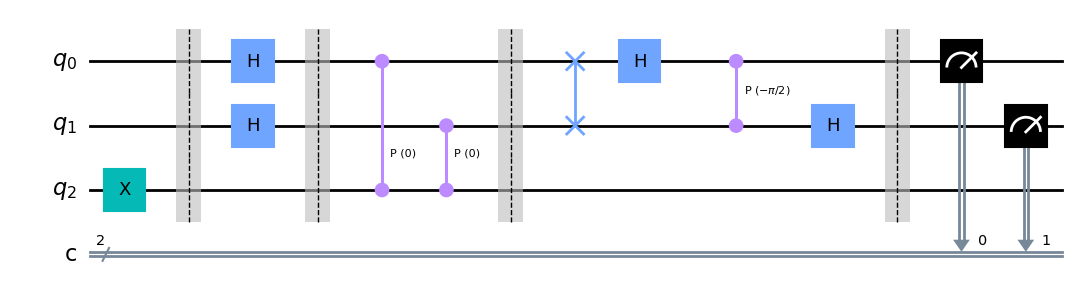

Theta: 0.0


C:\Users\jacob\AppData\Local\Temp\ipykernel_16828\3072155557.py:47: DeprecationWarning: Using plot_histogram() ``data`` argument with QuasiDistribution, ProbDistribution, or a distribution dictionary is deprecated as of qiskit-terra 0.22.0. It will be removed no earlier than 3 months after the release date. Instead, use ``plot_distribution()``.
  display(plot_histogram(result.quasi_dists))


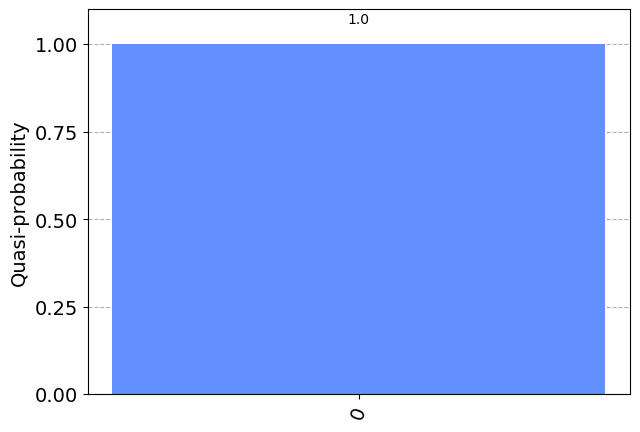

--------------------------------------------------
Theta: 0.6000000000000001


C:\Users\jacob\AppData\Local\Temp\ipykernel_16828\3072155557.py:47: DeprecationWarning: Using plot_histogram() ``data`` argument with QuasiDistribution, ProbDistribution, or a distribution dictionary is deprecated as of qiskit-terra 0.22.0. It will be removed no earlier than 3 months after the release date. Instead, use ``plot_distribution()``.
  display(plot_histogram(result.quasi_dists))


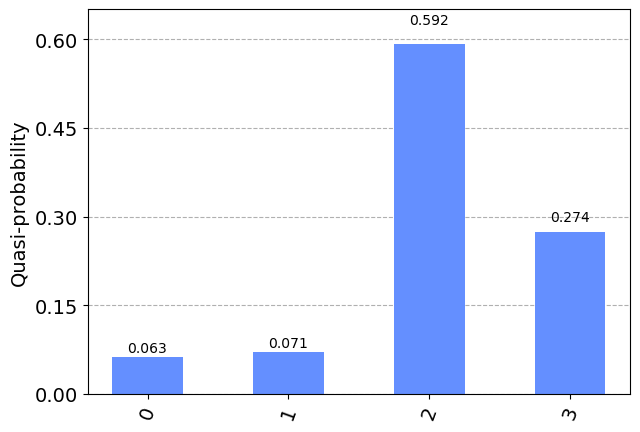

--------------------------------------------------


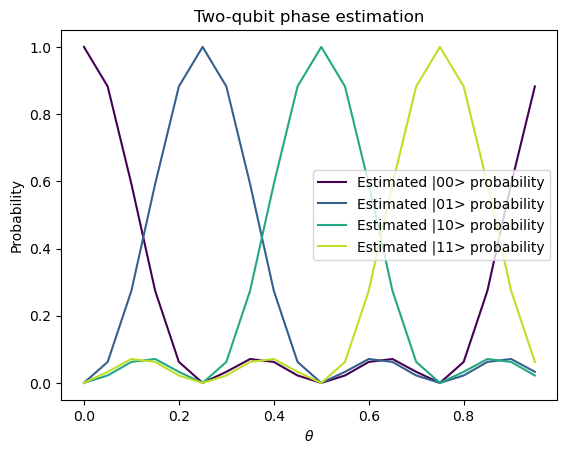

In [5]:
from qiskit.visualization import plot_histogram
from qiskit.primitives import Sampler
from matplotlib import pyplot as plt

thetas = np.arange(0, 1, 0.05).tolist()

zero = []
one = []
two = []
three = []

for theta in thetas:

    qc = QuantumCircuit(3, 2)

    if theta == 0:
        drawing = True
    else:
        drawing = False

    two_qubit_phase_estimation(qc, theta, draw_circuit=drawing)
    
    result = Sampler().run(qc).result()

    if 0 in result.quasi_dists[0]:
        zero.append(result.quasi_dists[0][0])
    else:
        zero.append(0)
    
    if 1 in result.quasi_dists[0]:
        one.append(result.quasi_dists[0][1])
    else:
        one.append(0)
        
    if 2 in result.quasi_dists[0]:
        two.append(result.quasi_dists[0][2])
    else:
        two.append(0)
        
    if 3 in result.quasi_dists[0]:
        three.append(result.quasi_dists[0][3])
    else:
        three.append(0)

    if theta == 0 or theta == 0.6000000000000001:
        print(f"Theta: {theta}")
        display(plot_histogram(result.quasi_dists))
        print('-'*50)
    
# colormap viridis
cmap = plt.get_cmap("viridis")

plt.figure()
plt.plot(thetas, zero, color = cmap(0), label="Estimated |00> probability")
plt.plot(thetas, one, color = cmap(0.3), label="Estimated |01> probability")
plt.plot(thetas, two, color = cmap(0.6), label="Estimated |10> probability")
plt.plot(thetas, three, color = cmap(0.9), label="Estimated |11> probability")
plt.legend()
plt.title("Two-qubit phase estimation")
plt.xlabel("$\\theta$")
plt.ylabel("Probability")
plt.show()


## n-qubit approximation

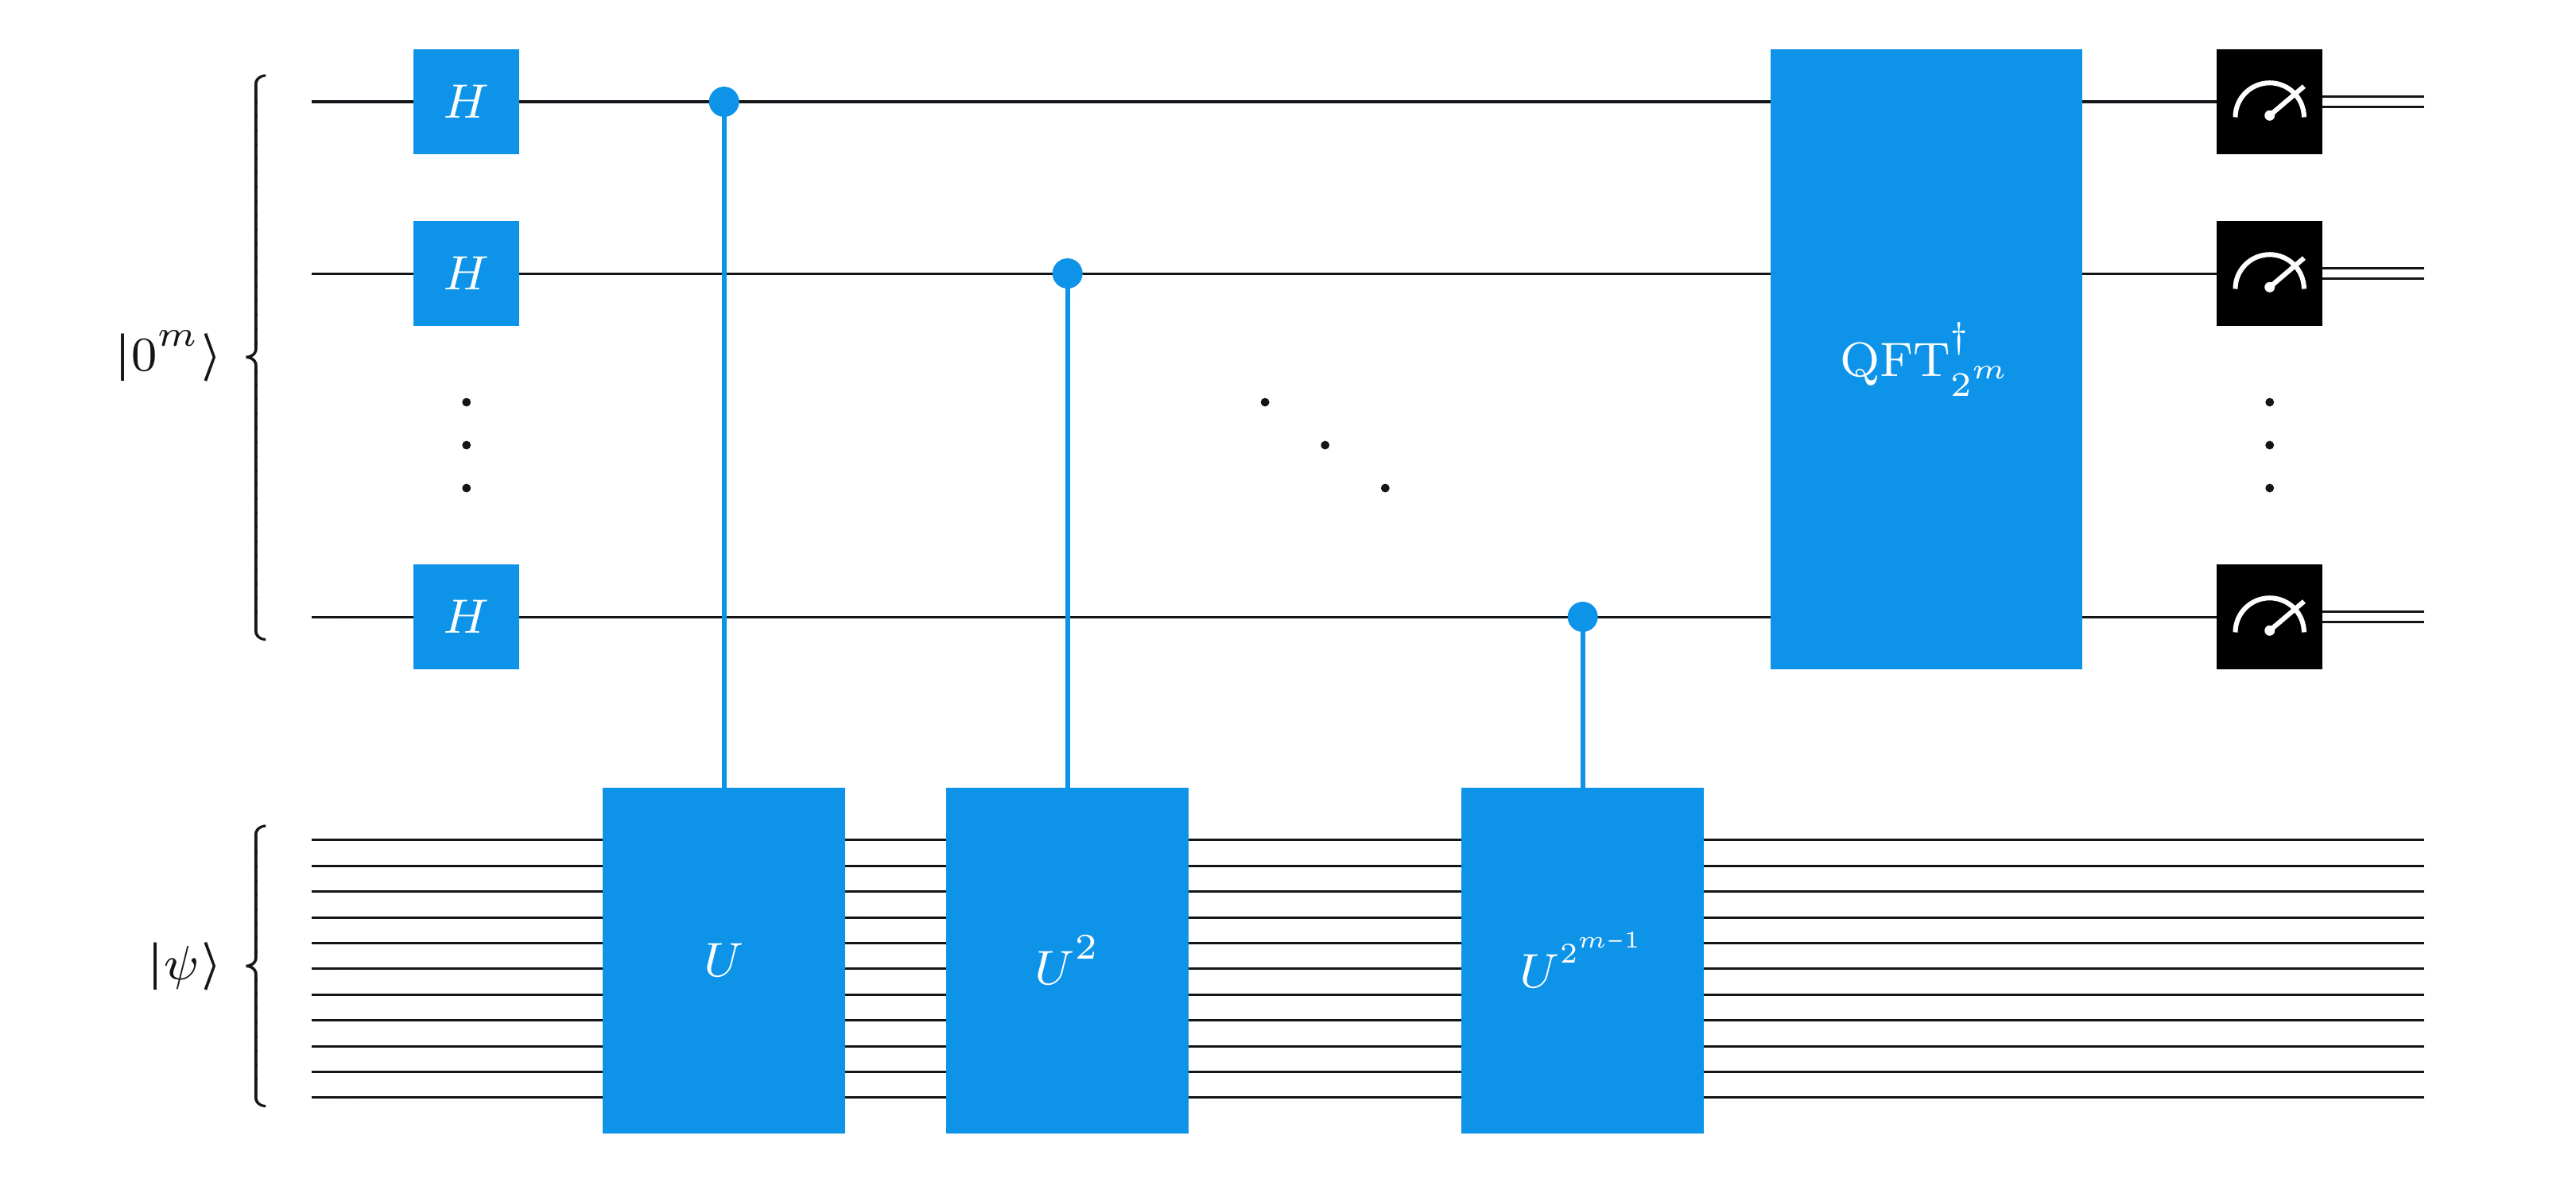

After the quantum Fourier transform is performed, the state of the circuit is this:

$$|\psi\rangle \otimes \frac{1}{2^m} \sum_{y=0}^{2^m-1} \sum_{x=0}^{2^m-1} e^{2 \pi i x\left(\theta-y / 2^m\right)}|y\rangle$$

For the value in which $y/2^m = \theta$, the sum of $x$ will be $2^m$. For those values of $y$ in which is non-zero, the sum in $x$ will be zero.

If neither value of $y/2^m$ is $\theta$, there will be a small disphase which will make the sum in the circle to not be zero and be in fact a small value.

This can be easily seen if we draw the values of the sumatories for each $y$ value.

Let us do it with an example in which the approximated value of $\theta$ is exact.


Example: $\theta = 0$

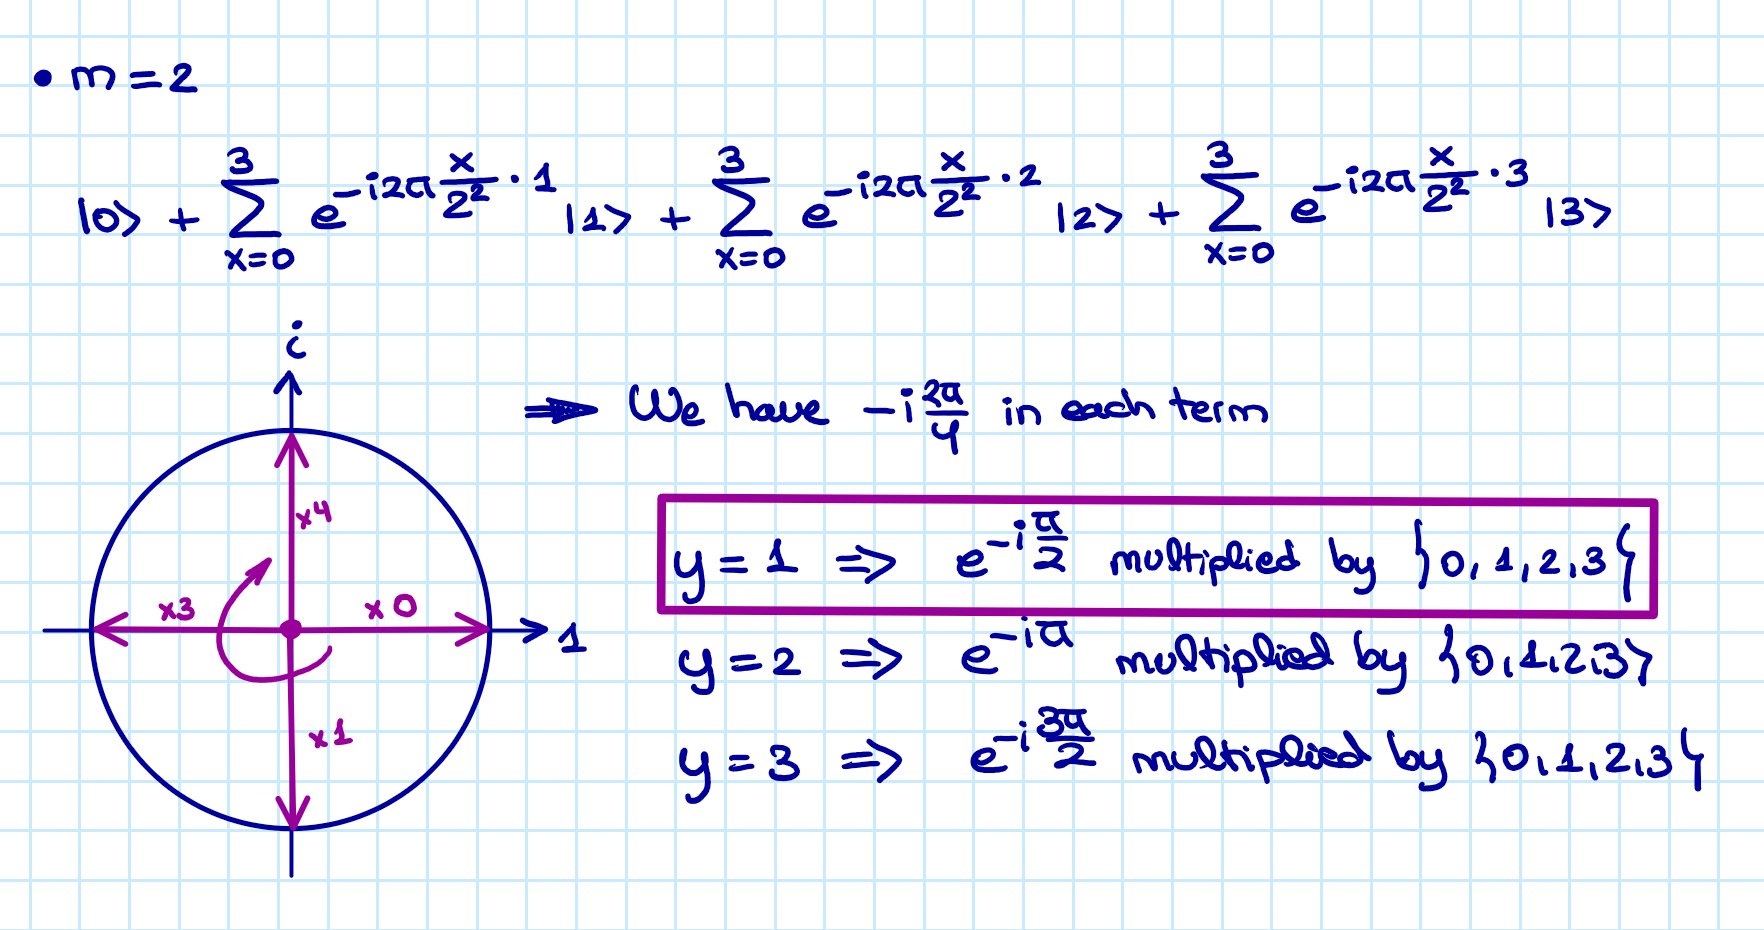